In [138]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import warnings
import os

# SKLEARN Libraries

# Model Selection
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    learning_curve,
    KFold,
)

from sklearn.metrics import mean_squared_error, make_scorer, r2_score
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

# Pipeline
from imblearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR



# Preprocessing
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, OneHotEncoder, MinMaxScaler

# Saving models
import pickle


In [2]:
random_state = 42

First lets read in the multiple csv files from the dataset folder

In [3]:
dirname = os.path.join(os.getcwd(), 'dataset')
datasets = {}
for file in os.listdir(dirname):
    car_brand = file.split('.')[0]
    file_data = pd.DataFrame(pd.read_csv(os.path.join(dirname, file)))
    df = pd.concat([pd.DataFrame([{"brand": car_brand} for i in range(len(file_data))]), file_data], axis=1)
    print(file.split('.')[0])
    display(df)
    datasets[car_brand] = df


audi


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
10663,audi,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,audi,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,audi,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,audi,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


bmw


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,bmw,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,bmw,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,bmw,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,bmw,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,bmw,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...,...
10776,bmw,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0
10777,bmw,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0
10778,bmw,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0
10779,bmw,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0


cclass


,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,cclass,C Class,2020,30495,Automatic,1200,Diesel,2.0
1,cclass,C Class,2020,29989,Automatic,1000,Petrol,1.5
2,cclass,C Class,2020,37899,Automatic,500,Diesel,2.0
3,cclass,C Class,2019,30399,Automatic,5000,Diesel,2.0
4,cclass,C Class,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...,...,...
3894,cclass,C Class,2017,14700,Manual,31357,Diesel,1.6
3895,cclass,C Class,2018,18500,Automatic,28248,Diesel,2.1
3896,cclass,C Class,2014,11900,Manual,48055,Diesel,2.1
3897,cclass,C Class,2014,11300,Automatic,49865,Diesel,2.1


focus


,brand,model,year,price,transmission,mileage,fuelType,engineSize
0,focus,Focus,2016,8000,Manual,38852,Petrol,1.0
1,focus,Focus,2019,13400,Manual,11952,Petrol,1.0
2,focus,Focus,2019,14600,Manual,22142,Petrol,1.5
3,focus,Focus,2016,9450,Manual,14549,Diesel,1.6
4,focus,Focus,2015,9999,Manual,7010,Diesel,1.6
...,...,...,...,...,...,...,...,...
5449,focus,Focus,2019,18745,Manual,7855,Diesel,2.0
5450,focus,Focus,2019,16350,Manual,13891,Petrol,1.0
5451,focus,Focus,2019,16850,Manual,13452,Petrol,1.0
5452,focus,Focus,2019,17310,Automatic,13376,Petrol,1.0


ford


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,ford,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,ford,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,ford,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,ford,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,ford,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...,...
17960,ford,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,ford,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,ford,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,ford,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


hyundi


,brand,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,hyundi,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,hyundi,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,hyundi,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,hyundi,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,hyundi,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...,...
4855,hyundi,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,hyundi,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,hyundi,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,hyundi,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


merc


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,merc,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,merc,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,merc,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,merc,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,merc,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...,...
13114,merc,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,merc,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,merc,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,merc,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


skoda


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,skoda,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,skoda,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,skoda,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,skoda,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,skoda,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5
...,...,...,...,...,...,...,...,...,...,...
6262,skoda,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2
6263,skoda,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4
6264,skoda,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0
6265,skoda,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0


toyota


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,toyota,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,toyota,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,toyota,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,toyota,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,toyota,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...,...
6733,toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


vauxhall


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,vauxhall,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,vauxhall,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,vauxhall,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,vauxhall,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,vauxhall,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4
...,...,...,...,...,...,...,...,...,...,...
13627,vauxhall,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4
13628,vauxhall,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8
13629,vauxhall,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8
13630,vauxhall,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9


vw


,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,vw,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,vw,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,vw,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,vw,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,vw,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...,...
15152,vw,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,vw,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,vw,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,vw,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


Since Focus and C Class arent car brands like the rest of the dataset but rather model types, we will have to first change its type accordingly (Ford Focus and Medcedes C Class). Both of these datasets also lack the tax and miles per gallon since they were scraped from an older source according to the owner of the dataset

In [4]:
datasets['cclass']['brand'] = 'merc'
datasets['focus']['brand'] = 'ford'

# Add the missing tax and mpg columns into ford Focus
datasets['cclass'].loc[:, ['tax', 'mpg']] = None
datasets['focus'].loc[:, ['tax', 'mpg']] = None
display(datasets['focus'])

,brand,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,ford,Focus,2016,8000,Manual,38852,Petrol,1.0,None,None
1,ford,Focus,2019,13400,Manual,11952,Petrol,1.0,None,None
2,ford,Focus,2019,14600,Manual,22142,Petrol,1.5,None,None
3,ford,Focus,2016,9450,Manual,14549,Diesel,1.6,None,None
4,ford,Focus,2015,9999,Manual,7010,Diesel,1.6,None,None
...,...,...,...,...,...,...,...,...,...,...
5449,ford,Focus,2019,18745,Manual,7855,Diesel,2.0,None,None
5450,ford,Focus,2019,16350,Manual,13891,Petrol,1.0,None,None
5451,ford,Focus,2019,16850,Manual,13452,Petrol,1.0,None,None
5452,ford,Focus,2019,17310,Automatic,13376,Petrol,1.0,None,None


Rename the tax column in the hyundi dataset to make it consistent with other Car Brands

In [5]:
datasets['hyundi'].rename(columns={'tax(£)': 'tax'}, inplace=True)
display(datasets['hyundi'])

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,hyundi,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,hyundi,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,hyundi,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,hyundi,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,hyundi,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...,...
4855,hyundi,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,hyundi,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,hyundi,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,hyundi,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


Now using the values from the Ford and Merc datasets, we can use them to impute the tax and mpg columns from the Focus and C Class datasets

In [6]:
print("Ford Models: ", datasets['ford']['model'].unique())
print("Merc Models: ", datasets['merc']['model'].unique())

Ford Models:  [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
Merc Models:  [' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class'
 ' A Class' ' B Class' ' GLC Class' ' C Class' ' E Class' ' GL Class'
 ' CLS Class' ' CLC Class' ' CLA Class' ' V Class' ' M Class' ' CL Class'
 ' GLS Class' ' GLB Class' ' X-CLASS' '180' ' CLK' ' R Class' '230' '220'
 '200']


First get a general overview

In [7]:
display(datasets['ford'][datasets['ford']['model'] == ' Focus'][['tax', 'mpg']].describe())
display(datasets['merc'][datasets['merc']['model'] == ' C Class'][['tax', 'mpg']].describe())

,tax,mpg
count,4588.000000,4588.000000
mean,111.156277,60.089385
std,63.634199,10.733369
min,0.000000,26.300000
25%,20.000000,55.400000
50%,145.000000,60.100000
75%,145.000000,67.300000
max,330.000000,83.100000


,tax,mpg
count,3747.000000,3747.000000
mean,118.405391,56.883133
std,63.088864,16.371416
min,0.000000,23.000000
25%,125.000000,46.300000
50%,145.000000,57.700000
75%,145.000000,64.200000
max,580.000000,217.300000


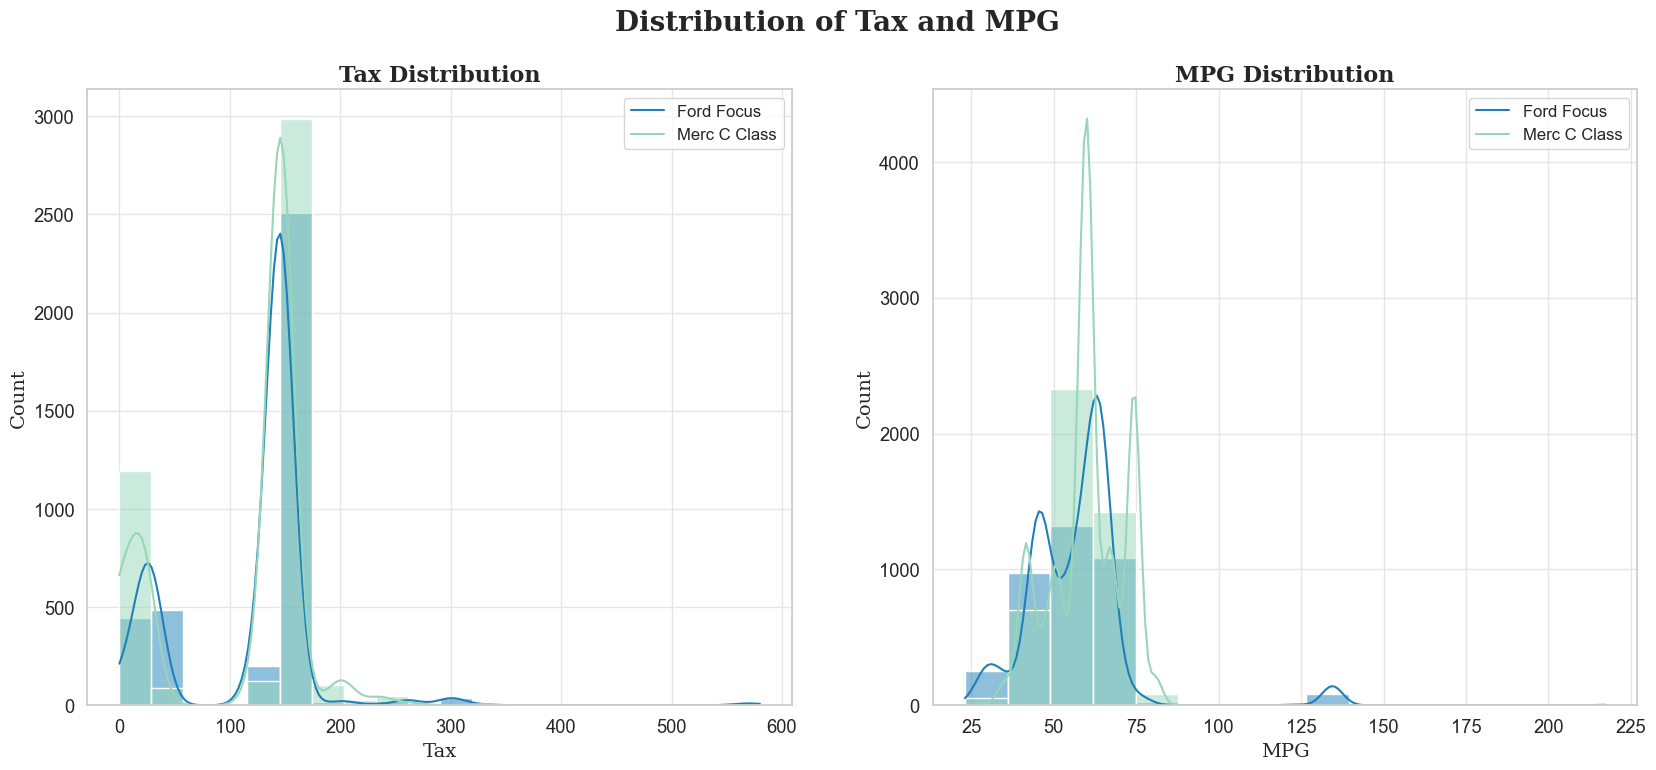

In [8]:
sns.set_context('notebook',  font_scale=1.2)
sns.set_style('whitegrid', {'grid.color': '0.9'})

combined_df =  pd.concat([datasets['ford'], datasets['merc']], axis=0)
# Drop all whose model is neither focus nor cclass
combined_df = combined_df[combined_df['model'].isin([' Focus', ' C Class'])]

fig, ax = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle("Distribution of Tax and MPG", fontfamily='serif', fontweight='bold', fontsize=20)

sns.histplot(data=combined_df, x='tax', ax=ax[0], kde=True, palette='YlGnBu', hue='model', bins=20)

ax[0].set_title("Tax Distribution", fontfamily='serif',fontweight='bold', fontsize=16)
ax[0].set_xlabel('Tax', fontfamily='serif', fontsize=14)
ax[0].set_ylabel('Count', fontfamily='serif', fontsize=14)
ax[0].legend(labels=['Ford Focus', 'Merc C Class'], loc='upper right', fontsize=12)


sns.histplot(data=combined_df, x='mpg', ax=ax[1], kde=True, palette='YlGnBu', hue='model', bins=15)

ax[1].set_title("MPG Distribution", fontfamily='serif',fontweight='bold', fontsize=16)
ax[1].set_xlabel('MPG', fontfamily='serif', fontsize=14)
ax[1].set_ylabel('Count', fontfamily='serif', fontsize=14)
ax[1].legend(labels=['Ford Focus', 'Merc C Class'], loc='upper right', fontsize=12)

plt.show()

**Observations**:
- From the graph, it seems that the Tax distribution have a similar distribution for Ford Focus and Merc C Class with both having a bimodal distribution
- The distribution for Miles Per Gallon are not as similar but they both seem to have a consistent mode at around 60
- From the histogram of the tax and MPG distribution, it seems safe to impute the missing values of tax and MPG with the median

Imputation using median

In [9]:
c_class_tax_median = datasets['merc'][datasets['merc']['model'] == ' C Class']['tax'].median()
focus_tax_median = datasets['ford'][datasets['ford']['model'] == ' Focus']['tax'].median()

c_class_mpg_median = datasets['merc'][datasets['merc']['model'] == ' C Class']['mpg'].median()
focus_mpg_median = datasets['ford'][datasets['ford']['model'] == ' Focus']['mpg'].median()


datasets['cclass'].loc[:, ['tax', 'mpg']] = [c_class_tax_median, c_class_mpg_median]
datasets['focus'].loc[:, ['tax', 'mpg']] = [focus_tax_median, focus_mpg_median]

datasets['cclass']['brand'] = 'merc'
datasets['focus']['brand'] = 'ford'

In [10]:
display(datasets['focus'].head())
display(datasets['cclass'].head())

,brand,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,ford,Focus,2016,8000,Manual,38852,Petrol,1.0,145.0,60.1
1,ford,Focus,2019,13400,Manual,11952,Petrol,1.0,145.0,60.1
2,ford,Focus,2019,14600,Manual,22142,Petrol,1.5,145.0,60.1
3,ford,Focus,2016,9450,Manual,14549,Diesel,1.6,145.0,60.1
4,ford,Focus,2015,9999,Manual,7010,Diesel,1.6,145.0,60.1


,brand,model,year,price,transmission,mileage,fuelType,engineSize,tax,mpg
0,merc,C Class,2020,30495,Automatic,1200,Diesel,2.0,145.0,57.7
1,merc,C Class,2020,29989,Automatic,1000,Petrol,1.5,145.0,57.7
2,merc,C Class,2020,37899,Automatic,500,Diesel,2.0,145.0,57.7
3,merc,C Class,2019,30399,Automatic,5000,Diesel,2.0,145.0,57.7
4,merc,C Class,2019,29899,Automatic,4500,Diesel,2.0,145.0,57.7


With all the data cleaned, we can now join all the datasets together into one

In [11]:
df = pd.concat(datasets.values())
display(df)

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,audi,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,audi,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,audi,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,audi,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,audi,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...
15152,vw,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0
15153,vw,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2
15154,vw,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4
15155,vw,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2


In [12]:
# Check for duplicates
print("Number of duplicates: ", df.duplicated().sum())

Number of duplicates:  3061


### 1. EDA

In [13]:
print(list(df.columns))

['brand', 'model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']


In [14]:
print(f"Shape: {df.shape}")
print(df.info())

Shape: (108540, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 108540 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   brand         108540 non-null  object 
 1   model         108540 non-null  object 
 2   year          108540 non-null  int64  
 3   price         108540 non-null  int64  
 4   transmission  108540 non-null  object 
 5   mileage       108540 non-null  int64  
 6   fuelType      108540 non-null  object 
 7   tax           108540 non-null  float64
 8   mpg           108540 non-null  float64
 9   engineSize    108540 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 9.1+ MB
None


**Data Dictionary**

| Column Name  | Data Type  | Definition  | 
|---|---|---|
| Brand  | Nominal Category  | Manufacturer of the car  |
|  Model |  Nominal Category | Model of the Car  |
| Year |  Numeric | Car Registration Year  |
| Transmission  | Ordinal Category | Type of Gearbox |
| Mileage  | Numeric  | Distance Used |
| FuelType  | Nominal Category | Engine Fuel Type |
| Tax  | Numeric  | Road Tax  |
| MPG  | Numeric  | Miles Per Gallon  |
| EngineSize  | Numeric  | Engine Size in litres  |
| Price | Target Variable  | Price of the car in Great Britain Pound  |

Now let's get a description of the data

In [15]:
print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
display(df.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS


,count,mean,std,min,25%,50%,75%,max
year,108540.0,2017.098028,2.130057,1970.0,2016.00,2017.0,2019.0,2060.0
price,108540.0,16890.124046,9756.266820,450.0,10229.50,14698.0,20940.0,159999.0
mileage,108540.0,23025.928469,21176.423684,1.0,7491.75,17265.0,32236.0,323000.0
tax,108540.0,122.428275,60.765335,0.0,125.00,145.0,145.0,580.0
mpg,108540.0,55.505709,15.470838,0.3,47.10,56.5,61.4,470.8
engineSize,108540.0,1.661644,0.557058,0.0,1.20,1.6,2.0,6.6


**Observations**:
- From year, it seems that there contains data in the year 2060. However, this does not make sense

In [16]:
# Get all unique years from the dataset
print(np.sort(df['year'].unique()))

[1970 1991 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2060]


From the dataset, it seems that the only year that does not make sense is 2060

In [17]:
display(df[df['year'] == 2060])

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,ford,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4


There is only one record with the year 2060 suggesting that it is likely a typo. However, since there is no way to get back the original year for the record, we would be better off deleting it

In [18]:
df.drop(df[df['year'] == 2060].index, inplace=True)
print(np.sort(df['year'].unique()))

[1970 1991 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]


Next lets check the dataset for any missing values or duplicate records

In [19]:
print("MISSING VALUES:")
print(df.isnull().sum())
print('\n')
print("NUMBER OF DUPLICATES: ", df.duplicated(keep='first').sum())

MISSING VALUES:
brand           0
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


NUMBER OF DUPLICATES:  3061


From the dataset, it seems that there is no missing values but there contains 3061 duplicate records. As such, let's delete the duplicate records from the dataset

In [20]:
# Delete duplicates
df.drop_duplicates(keep='first', inplace=True)
print("NUMBER OF DUPLICATES: ", df.duplicated(keep='first').sum())

NUMBER OF DUPLICATES:  0


Let us convert all the categorical variables into the type category

In [79]:
df[['brand', 'model', 'transmission', 'fuelType']] = df[['brand', 'model', 'transmission', 'fuelType']].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105217 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   brand         105217 non-null  category
 1   model         105217 non-null  category
 2   year          105217 non-null  int64   
 3   price         105217 non-null  int64   
 4   transmission  105217 non-null  category
 5   mileage       105217 non-null  int64   
 6   fuelType      105217 non-null  category
 7   tax           105217 non-null  float64 
 8   mpg           105217 non-null  float64 
 9   engineSize    105217 non-null  float64 
dtypes: category(4), float64(3), int64(3)
memory usage: 6.1 MB
None


Next, let us check all the possible values for the categorical columns

In [74]:
print('BRAND: ')
print(df['brand'].unique())
print('\n')
print('MODEL: ')
print(df['model'].unique())
print('\n')
print('TRANSMISSION: ')
print(df['transmission'].unique())
print('\n')
print('FUEL TYPE: ')
print(df['fuelType'].unique())
print('\n')

BRAND: 
['audi' 'bmw' 'merc' 'ford' 'hyundi' 'skoda' 'toyota' 'vauxhall' 'vw']


MODEL: 
['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5' 'S8' 'SQ7' 'S3' 'S5' 'A2' 'RS7'
 '5 Series' '6 Series' '1 Series' '7 Series' '2 Series' '4 Series' 'X3'
 '3 Series' 'X5' 'X4' 'i3' 'X1' 'M4' 'X2' 'X6' '8 Series' 'Z4' 'X7' 'M5'
 'i8' 'M2' 'M3' 'M6' 'Z3' 'C Class' 'Focus' 'Fiesta' 'Puma' 'Kuga'
 'EcoSport' 'C-MAX' 'Mondeo' 'Ka+' 'Tourneo Custom' 'S-MAX' 'B-MAX' 'Edge'
 'Tourneo Connect' 'Grand C-MAX' 'KA' 'Galaxy' 'Mustang'
 'Grand Tourneo Connect' 'Fusion' 'Ranger' 'Streetka' 'Escort'
 'Transit Tourneo' 'I20' 'Tucson' 'I10' 'IX35' 'I30' 'I40' 'Ioniq' 'Kona'
 'Veloster' 'I800' 'IX20' 'Santa Fe' 'Accent' 'Terracan' 'Getz' 'Amica'
 'SLK' 'S Class' 'SL CLASS' 'G Class' 'GLE Class' 'GLA Class' 'A Class'
 'B Class' 'GLC Class' 'E Class' 'GL Class' 'CLS Class' 'CLC Class'
 'CLA Class' 'V Class' 'M Class' 'CL Class' 'GLS Class' 'GLB Class'
 'X-CLASS' 

From the possible values, we notice that there is always a leading space for the values in the model column so let's first strip that space

In [22]:
# Strip the leading space in the model column
df['model'] = df['model'].apply(lambda x: x.strip())
print(df['model'].unique())

['A1' 'A6' 'A4' 'A3' 'Q3' 'Q5' 'A5' 'S4' 'Q2' 'A7' 'TT' 'Q7' 'RS6' 'RS3'
 'A8' 'Q8' 'RS4' 'RS5' 'R8' 'SQ5' 'S8' 'SQ7' 'S3' 'S5' 'A2' 'RS7'
 '5 Series' '6 Series' '1 Series' '7 Series' '2 Series' '4 Series' 'X3'
 '3 Series' 'X5' 'X4' 'i3' 'X1' 'M4' 'X2' 'X6' '8 Series' 'Z4' 'X7' 'M5'
 'i8' 'M2' 'M3' 'M6' 'Z3' 'C Class' 'Focus' 'Fiesta' 'Puma' 'Kuga'
 'EcoSport' 'C-MAX' 'Mondeo' 'Ka+' 'Tourneo Custom' 'S-MAX' 'B-MAX' 'Edge'
 'Tourneo Connect' 'Grand C-MAX' 'KA' 'Galaxy' 'Mustang'
 'Grand Tourneo Connect' 'Fusion' 'Ranger' 'Streetka' 'Escort'
 'Transit Tourneo' 'I20' 'Tucson' 'I10' 'IX35' 'I30' 'I40' 'Ioniq' 'Kona'
 'Veloster' 'I800' 'IX20' 'Santa Fe' 'Accent' 'Terracan' 'Getz' 'Amica'
 'SLK' 'S Class' 'SL CLASS' 'G Class' 'GLE Class' 'GLA Class' 'A Class'
 'B Class' 'GLC Class' 'E Class' 'GL Class' 'CLS Class' 'CLC Class'
 'CLA Class' 'V Class' 'M Class' 'CL Class' 'GLS Class' 'GLB Class'
 'X-CLASS' '180' 'CLK' 'R Class' '230' '220' '200' 'Octavia' 'Citigo'
 'Yeti Outdoor' 'Superb' 'Kodi

There also contains the value of 'Others' in transmission and fuelType which is essentially the same as containing missing values

In [76]:
print(df['transmission'].value_counts())
print('\n')
print(df['fuelType'].value_counts())

Manual       59202
Semi-Auto    24368
Automatic    21898
Name: transmission, dtype: int64


Petrol      57794
Diesel      44209
Hybrid       3208
Other         251
Electric        6
Name: fuelType, dtype: int64


Since there are only 10 others in transmission and 251 in fuelType, it is not a lot of data and we can drop them off

In [77]:
# Drop all data with transmission as 'Other'
df = df[df['transmission'] != 'Other']
print(df['transmission'].value_counts())

print('\n')

df = df[df['fuelType'] != 'Other']
print(df['fuelType'].value_counts())

Manual       59202
Semi-Auto    24368
Automatic    21898
Name: transmission, dtype: int64


Petrol      57794
Diesel      44209
Hybrid       3208
Electric        6
Name: fuelType, dtype: int64


Let's also set the order of our transmission data since it is ordinal

In [94]:
df['transmission'] = df['transmission'].cat.reorder_categories(['Manual', 'Semi-Auto', 'Automatic'], ordered=True)

To prevent the mutation of our original dataset, we will make a copy of it for our EDA

In [80]:
df_eda = df.copy()

## 2. Data Preparation

In [95]:
X, y = df.drop('price', axis=1), df['price']

In [96]:
# Split thge data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [97]:
# Reset the index
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [98]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (84173, 9)
X_test shape:  (21044, 9)


#### **Categorical Encoding**

As our dataset contains categorical data and many machine learning models can only work with numerical values, it is necessary to transform the categorical values of relevant features into numerical ones. This process is known as encoding and there are several ways to encode our data:

1. One Hot Encoder
2. Label Encoder
3. Ordinal Encoder

We will be using One Hot Encoder for our categorical features that are nominal such as brand, model and fuelType while we will be using Ordinal Encoder for our categorical features that are Ordinal such as transmission

In [100]:
print(X_train['transmission'].unique())

['Manual', 'Automatic', 'Semi-Auto']
Categories (3, object): ['Manual' < 'Semi-Auto' < 'Automatic']


In [140]:
X_enc, y_enc = X_train.copy(), y_train.copy()
warnings.filterwarnings('ignore')

# One hot encode the categorical columns
brand_categories = list(df.brand.unique())
model_categories = list(df.model.unique())
fuelType_categories = list(df.fuelType.unique())

brandOneHotEnc = OneHotEncoder(categories=[brand_categories], sparse=False, handle_unknown='ignore')
X_enc[brand_categories] = brandOneHotEnc.fit_transform(X_train[['brand']])
# Show brand categories and brand in the dataframe
print("ONE HOT ENCODED BRAND CATEGORIES: ")
display(X_enc[['brand'] + brand_categories].head())

modelOneHotEnc = OneHotEncoder(categories=[model_categories], sparse=False, handle_unknown='ignore')
X_enc[model_categories] = modelOneHotEnc.fit_transform(X_train[['model']])
# Show model categories and model in the dataframe
print("ONE HOT ENCODED MODEL CATEGORIES: ")
display(X_enc[['model'] + model_categories].head())

fuelTypeOneHotEnc = OneHotEncoder(categories=[fuelType_categories], sparse=False, handle_unknown='ignore')
X_enc[fuelType_categories] = fuelTypeOneHotEnc.fit_transform(X_train[['fuelType']])
# Show fuelType categories and fuelType in the dataframe
print("ONE HOT ENCODED FUEL TYPE CATEGORIES: ")
display(X_enc[['fuelType'] + fuelType_categories].head())

# Ordinal encode the transmission column
transmission_categories = ['Manual', 'Semi-Auto', 'Automatic']
transmissionOrdEnc = OrdinalEncoder(categories=[transmission_categories], handle_unknown='use_encoded_value', unknown_value=-1)
X_enc['transmission_enc'] = transmissionOrdEnc.fit_transform(X_train[['transmission']])
# Show transmission categories and transmission in the dataframe
print("ORDINAL ENCODED TRANSMISSION CATEGORIES: ")
display(X_enc[['transmission', 'transmission_enc']].head())

ONE HOT ENCODED BRAND CATEGORIES: 


,brand,audi,bmw,merc,ford,hyundi,skoda,toyota,vauxhall,vw
0,vw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,toyota,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,toyota,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,audi,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ford,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


ONE HOT ENCODED MODEL CATEGORIES: 


,model,A1,A6,A4,A3,Q3,Q5,A5,S4,Q2,...,Tiguan Allspace,Shuttle,Jetta,CC,California,Caddy Life,Caddy,Caddy Maxi,Eos,Fox
0,T-Cross,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Auris,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,RAV4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Focus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ONE HOT ENCODED FUEL TYPE CATEGORIES: 


,fuelType,Petrol,Diesel,Hybrid,Electric
0,Diesel,0.0,1.0,0.0,0.0
1,Hybrid,0.0,0.0,1.0,0.0
2,Petrol,1.0,0.0,0.0,0.0
3,Petrol,1.0,0.0,0.0,0.0
4,Diesel,0.0,1.0,0.0,0.0


ORDINAL ENCODED TRANSMISSION CATEGORIES: 


,transmission,transmission_enc
0,Manual,0.0
1,Automatic,2.0
2,Automatic,2.0
3,Semi-Auto,1.0
4,Manual,0.0


#### **Feature Scaling**

Feature Scaling is the process of scaling numerical features within the dataset to a similar scale.



Certain Machine Learning Algorithms such as `Gradient Descent Based Algorithms` (e.g. Linear Regression, Ridge Regression, Perceptron) and `Distance Based Algorithms` (e.g. KNNRegressor and SVR) are more sensitive to feature scaling and requires the data to be scaled.

On the other hand, `Tree Based Algorithms` (e.g. RandomForest, GradientBoosting) are more insensitive to the scale of the features since trees only split a node based on a single feature. This means that other features do not influence this split which explains why different features can be of different scales

There are two popular ways to perform Feature Scaling:
1. Normaliation
2. Standardization

<ins>Normalization</ins>

Normalization also known as Min-Max scaling, is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. 

In SKLearn, Normalization can be implemented using `MinMaxScaler`

**Formula**:

$\begin{equation}
X' = \frac{X - X_{min}}{X_{max} - X_{min}}
\end{equation}$

<ins>Standardization</ins>

Standardization is another scaling method where values are centered around the mean with a unit standard deviation. This means that the mean of the feautre becomes zero and the distribution of the scaled feature has a unit standard deviation (or a standard deviation of 1).

In SKlearn, Standardization can be implemented using `StandardScaler`

**Formula**:

$\begin{equation}
X' = \frac{X - \mu}{\sigma}
\end{equation}$

Standardization vs Normalization

| Standardization | Normalization |
| --------------- | ------------- |
| Less Sensitive to outliers | Sensitive to outliers |
| Centers data around the mean and scales to a standard deviation of 1 | Rescales values to a range between 0 and 1 |
| Preserves the relationship between data points | May not preserve the relationship between the data points |
| Changes the shape of the original distribution | Retains the shape of the original distribution |


In [141]:
X_enc_scaled, y_enc_scaled = X_enc.copy(), y_enc.copy()

# Scale the numeric columns
scaler = StandardScaler()

numeric_cols = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Fit the scaler to the training data and transform
X_enc_scaled[numeric_cols] = scaler.fit_transform(X_enc[numeric_cols])
print("SCALED NUMERIC COLUMNS: ")
display(X_enc_scaled[numeric_cols].head())

SCALED NUMERIC COLUMNS: 


,year,mileage,tax,mpg,engineSize
0,0.908006,-1.062414,0.373031,-0.139874,-0.124162
1,-1.431480,1.337373,-1.990732,1.007305,0.235235
2,-6.110454,1.030271,3.388868,-1.658394,0.594632
3,0.908006,-0.831322,0.454541,-0.875925,-0.303860
4,-0.027788,0.394403,-1.990732,1.252655,-0.303860


## 3. Model Selection

In order to select a model for hyperparameter tuning, we will run the preprocessed data through some models and deem the best model based on the evaluation metrics to be chosen later

#### **Pipeline**

First, we will use a pipeline to preprocess the data (the same way as done in part 2) since a pipeline can help:
1. Improve ML Workflow
2. Prevent Data Leakage from the Train subset into the Test subset

In [56]:
ordinal_features = ['transmission']
nominal_features = ['brand', 'model', 'fuelType']
numeric_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

brand_categories = df.brand.unique()
model_categories = df.model.unique()
fuelType_categories = df.fuelType.unique()

# Transformer for numeric features
numericTransformer = ColumnTransformer(
    [
        ('scaler', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

# Transformer for categorical features
categoricalTransformer = ColumnTransformer(
    [
        ('ordinal', OrdinalEncoder(categories=[['Manual', 'Semi-Auto', 'Automatic']]), ordinal_features),
        ('brandOneHot', OneHotEncoder(categories=[brand_categories], sparse=False), ['brand']),
        ('modelOneHot', OneHotEncoder(categories=[model_categories], sparse=False), ['model']),
        ('fuelTypeOneHot', OneHotEncoder(categories=[fuelType_categories], sparse=False), ['fuelType'])
    ],
    remainder='passthrough'
)

preprocessor = ColumnTransformer(
    [
        ('numeric', numericTransformer, numeric_features),
        ('categorical', categoricalTransformer, nominal_features + ordinal_features)
    ],
    remainder='passthrough'
)

steps = [
    ('preprocessor', preprocessor),
    ('model')
]

model_step = len(steps) - 1

#### **Evaluation Metrics**

<ins>Mean Squared Error</ins>

Mean Squared Error is the sum of error at each point (error is the square of actual - predicted at a point) divided by the total number of points

**Formula**:
$ \begin{equation}
MSE = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}
\nonumber
\end{equation}$

<ins>Root Mean Squared Error</ins>

Root Mean Squared Error the square root of the Mean Squared Error. 

**Formula**:
$ \begin{equation}
RMSE = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n}}
\nonumber
\end{equation}$

<ins>R2</ins>

R2, also known as the coefficient of determinant, measures the proportion of variance in the dependent variable that can be explained by the independent variables in a regression model

**Formula**:

$ \begin{equation}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\nonumber
\end{equation}$


In [57]:
# Use scorers from sklearn.metrics for evaluation in cross validation
evaluation_metrics = {
    'RMSE': make_scorer(mean_squared_error, squared=False),
    'r2': 'r2'
}

In [58]:
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=KFold(shuffle=True, random_state=random_state),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
            
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.1,
            1.0,
        )
    )
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

In [59]:
# Instantiate the models
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=random_state)),
    ('Random Forest Regressor', RandomForestRegressor(random_state=random_state)),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=random_state)),
    ('Ridge', Ridge(random_state=random_state)),
    ('Lasso', Lasso(random_state=random_state)),
]

##### <ins> Models Explained </ins>

1. `Linear Regression`

Linear Regression is one of the most simple models for regression problems. It fits a linear function

$\begin{equation}
f(x) = mx + c
\nonumber
\end{equation}$

to try and predict the value of a variable based on previous values


2. `Decision Tree`

A decision tree is the simplest of all tree-based model. The base of the tree is the root node and from the root node flows a series of decision nodes. Each decision node can then be split into further sub-nodes. Nodes that no longer split are called leaf or terminal nodes. The main contributor affecting the decision tree's accuracy is how each decision node is split 

3. `Random Forest` 

In Random Forest, bagging is used to generate multiple training sets with replacement (i.e. the initial dataset is divided into multiple datasets using randomized sampling). Then a single decision tree is built on each sample before the resultant prediction is combined using either voting or averaging in parallel


4. `Gradient Boosting`

Gradient Boosting is similar to Random Forest in that it is also made up of an ensemble of Decision Trees. However, instead of using a single tree to build on each sample, each new tree is built to improve on the deficiencies of the previous tree (also known as boosting). This is done by minimising the loss function as the algorithm builds each tree

5. `Ridge`

Ridge Regression performs L2 regularization for a linear regression model to prevent it from overfitting.

$\begin{align}
Ridge(w,b) &= error function + L2 regularization term \\
\nonumber
&= \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} w_{j}^{2}
\nonumber
\end{align}$

In Ridge Regression, the coefficient can be reduced but it will never reach 0 (none of the features will be removed)

6. `Lasso`

Lasso Regression performs L1 regularization for a linear regression model to prevent it from overfitting.

$\begin{align}
Lasso(w,b) &= error function + L1 regularization term \\
\nonumber
&= \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |w_{j}|
\nonumber
\end{align}$

In Lasso Regression, it is possible for the coefficient of a feature to be reduced to 0 (the feature is removed)

fit_time         6.382693e+00
score_time       1.483886e-01
test_neg_RMSE   -2.354023e+13
test_RMSE        2.354023e+13
test_r2         -1.230848e+19
dtype: float64

fit_time            3.375702
score_time          0.139624
test_neg_RMSE   -2555.460270
test_RMSE        2555.460270
test_r2             0.931961
dtype: float64

fit_time          101.222485
score_time          0.817052
test_neg_RMSE   -2023.387330
test_RMSE        2023.387330
test_r2             0.957403
dtype: float64

fit_time          109.318752
score_time          0.113779
test_neg_RMSE   -3133.130994
test_RMSE        3133.130994
test_r2             0.897921
dtype: float64

fit_time           48.342466
score_time          0.708743
test_neg_RMSE   -8068.236093
test_RMSE        8068.236093
test_r2             0.317449
dtype: float64

fit_time            0.985289
score_time          0.072797
test_neg_RMSE   -5513.779326
test_RMSE        5513.779326
test_r2             0.683985
dtype: float64

fit_time            0.609382
score_time          0.072413
test_neg_RMSE   -3773.200074
test_RMSE        3773.200074
test_r2             0.851980
dtype: float64

fit_time           35.903269
score_time          0.068758
test_neg_RMSE   -3797.544162
test_RMSE        3797.544162
test_r2             0.850069
dtype: float64

,fit_time,score_time,test_neg_RMSE,test_RMSE,test_r2
Random Forest Regressor,101.222485,0.817052,-2.023387e+03,2.023387e+03,9.574029e-01
Decision Tree Regressor,3.375702,0.139624,-2.555460e+03,2.555460e+03,9.319615e-01
Gradient Boosting Regressor,109.318752,0.113779,-3.133131e+03,3.133131e+03,8.979211e-01
Ridge,0.609382,0.072413,-3.773200e+03,3.773200e+03,8.519804e-01
Lasso,35.903269,0.068758,-3.797544e+03,3.797544e+03,8.500694e-01
Elastic Net Regressor,0.985289,0.072797,-5.513779e+03,5.513779e+03,6.839846e-01
Ada Boost Regressor,48.342466,0.708743,-8.068236e+03,8.068236e+03,3.174485e-01
Linear Regression,6.382693,0.148389,-2.354023e+13,2.354023e+13,-1.230848e+19


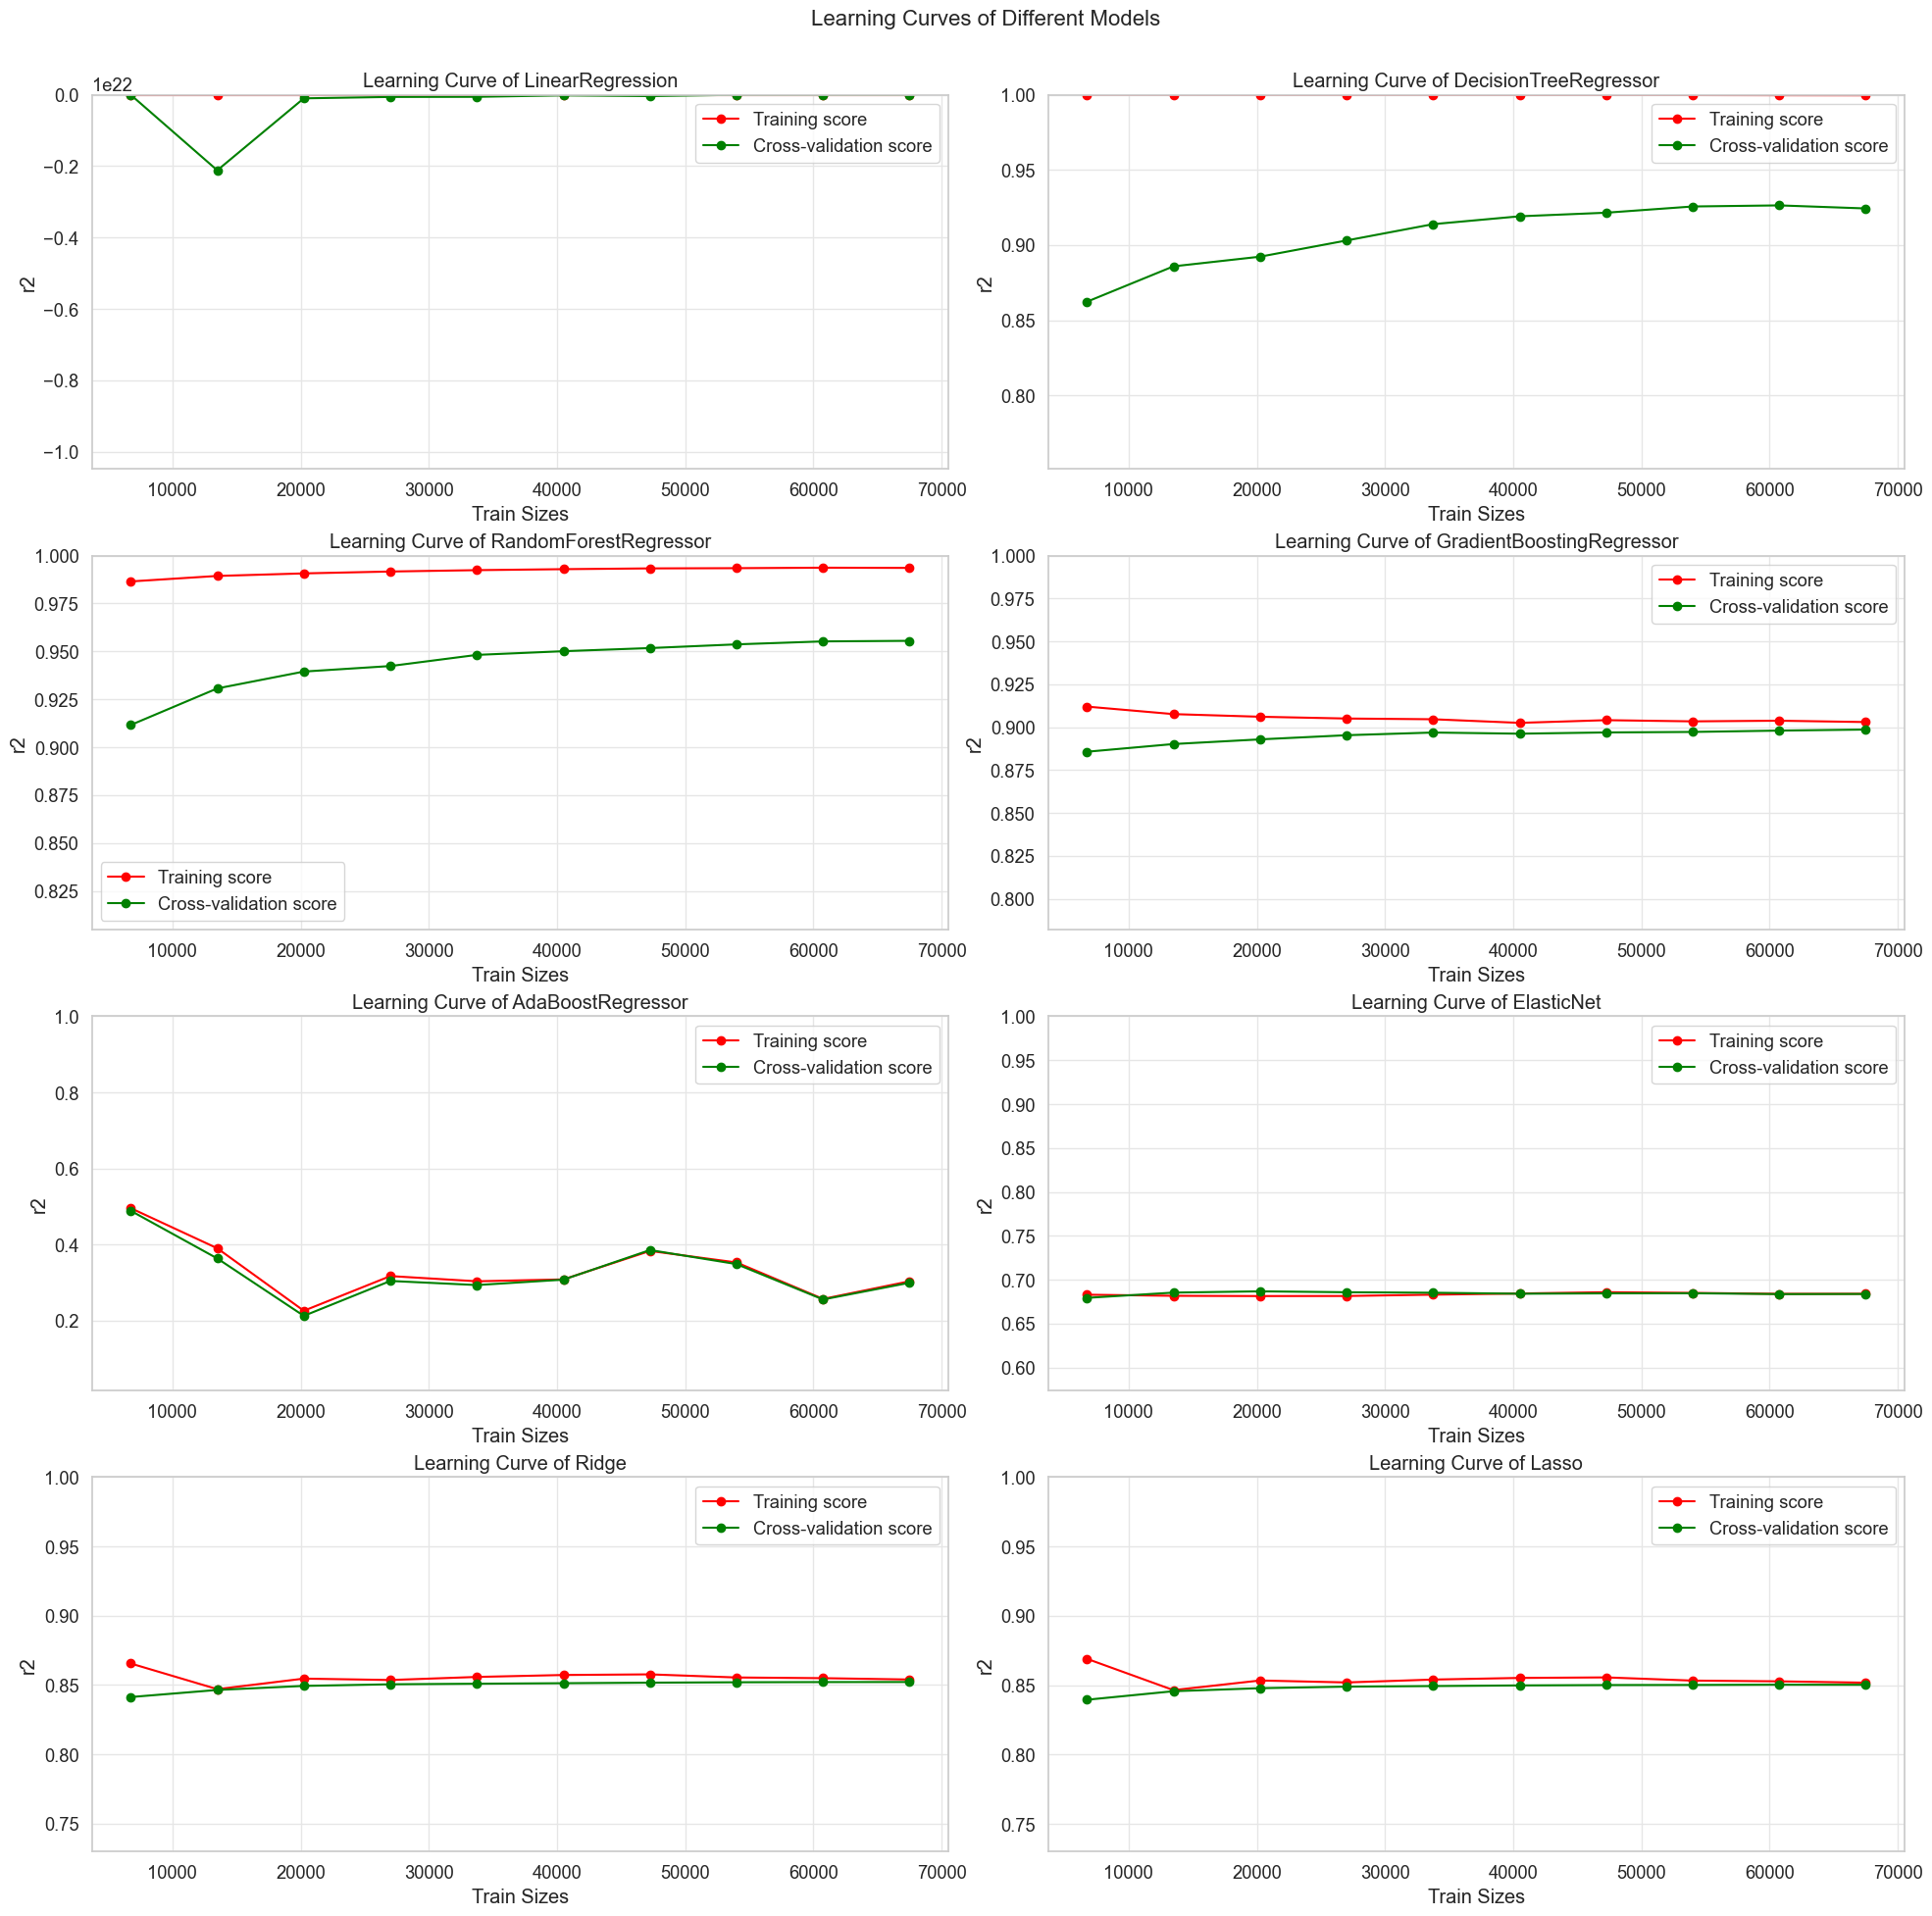

In [60]:
# 35m
Final_Score = pd.DataFrame()

fig,ax = plt.subplots(3, 2, figsize=(20, 20))
fig.set_facecolor('white')
# Set title
fig.suptitle("Learning Curves of Different Models", fontsize=16)

# Set padding between each subplot
fig.tight_layout(pad=2.5)

for name, model in models:
    steps[model_step] = ('model', model)
    pipe = Pipeline(steps=steps)
    # Plot learning curve 
    plot_learning_curve(
            pipe,
            X_train,
            y_train,
            scoring='r2',
            ax=ax[models.index((name, model))//2, models.index((name, model))%2]
        )
    # Cross validate
    scores = pd.DataFrame(cross_validate(pipe, X_train, y_train, scoring=evaluation_metrics, cv=5, return_train_score=False, n_jobs=-1)).mean(axis=0)
    Final_Score[name] = scores

with pd.option_context('display.float_format', '{:.5f}'.format):
    display(Final_Score.sort_values(
        by=[
            'test_r2',
            'test_neg_RMSE'
        ],
        ascending=False,
        axis=1
    ).T)


**Observations**:
- From the scores, it seems that Linear Regression seems to have the worst r2 score while Ridge and Lasso are not doing that bad themselves. In this case, it seems that the Ridge and Lassso models are effectively capturing the underlying relationship in the data and providing a much better fit compared to the simple linear regression model
- It seems that all the tree based models are doing very well with an r2 of about 0.9 and a RMSE of around 2k-3k

We will be selecting three models for hyperparameter tuning. They are:
- Decision Tree 
- Random Forest
- Gradient Boosting

**Initializing Decision Tree**

In [70]:
# Decision Tree (12s)
steps[model_step] = ('model', DecisionTreeRegressor(random_state=random_state))

tree = Pipeline(steps=steps)
tree.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(
    tree,
    X_train,
    y_train,
    cv=10,
    scoring=evaluation_metrics,
    n_jobs=-1,
    return_train_score=True,
))
scores.loc['mean'] = scores.mean(axis=0)
# displaying scores
display(scores)

,fit_time,score_time,test_neg_RMSE,train_neg_RMSE,test_RMSE,train_RMSE,test_r2,train_r2
0,5.95057,0.07574,-2410.04790,-208.18212,2410.04790,208.18212,0.93693,0.99955
1,6.08880,0.09397,-2899.68698,-211.61264,2899.68698,211.61264,0.91948,0.99953
2,6.07180,0.08797,-2308.66586,-198.47232,2308.66586,198.47232,0.94417,0.99959
3,6.09829,0.09648,-2308.69321,-206.64369,2308.69321,206.64369,0.94492,0.99956
4,6.21377,0.11907,-2538.02454,-204.47475,2538.02454,204.47475,0.93155,0.99957
5,6.14175,0.09701,-2588.98451,-202.28253,2588.98451,202.28253,0.92606,0.99958
6,6.10729,0.11148,-2353.71188,-208.35122,2353.71188,208.35122,0.94202,0.99955
7,6.19576,0.11007,-2812.39437,-206.07682,2812.39437,206.07682,0.92102,0.99956
8,6.10428,0.11548,-2426.25104,-196.86883,2426.25104,196.86883,0.93776,0.99960
9,5.98818,0.06714,-2798.93456,-199.40456,2798.93456,199.40456,0.92025,0.99959


**Initializing RandomForest**

In [71]:
# Random Forest (5m 18s)
steps[model_step] = ('model', RandomForestRegressor(random_state=random_state))

rf = Pipeline(steps=steps)
rf.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(
    rf,
    X_train,
    y_train,
    cv=10,
    scoring=evaluation_metrics,
    n_jobs=-1,
    return_train_score=True,
))
scores.loc['mean'] = scores.mean(axis=0)
# displaying scores
display(scores)

,fit_time,score_time,test_neg_RMSE,train_neg_RMSE,test_RMSE,train_RMSE,test_r2,train_r2
0,219.23560,1.07147,-2026.57689,-777.98174,2026.57689,777.98174,0.95540,0.99374
1,218.96710,1.09198,-2387.61228,-766.93115,2387.61228,766.93115,0.94541,0.99383
2,219.71809,1.35968,-1866.16479,-785.32850,1866.16479,785.32850,0.96352,0.99360
3,221.13815,1.40227,-1946.29593,-783.11945,1946.29593,783.11945,0.96086,0.99362
4,222.64774,1.18645,-1882.18027,-773.79418,1882.18027,773.79418,0.96235,0.99379
5,222.53442,1.32244,-1898.35061,-777.58058,1898.35061,777.58058,0.96025,0.99376
6,218.50735,1.07598,-1805.96943,-782.79607,1805.96943,782.79607,0.96587,0.99364
7,220.76046,1.14530,-2188.64773,-760.43789,2188.64773,760.43789,0.95217,0.99396
8,218.38635,1.14298,-1890.86205,-766.00013,1890.86205,766.00013,0.96220,0.99391
9,218.70222,1.27096,-2272.04650,-752.27264,2272.04650,752.27264,0.94745,0.99410


**Initializing Gradient Boosting**

In [72]:
# Gradient Boosting (5m 16s)
steps[model_step] = ('model', GradientBoostingRegressor(random_state=random_state))

gb = Pipeline(steps=steps)
gb.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(
    gb,
    X_train,
    y_train,
    cv=10,
    scoring=evaluation_metrics,
    n_jobs=-1,
    return_train_score=True,
))
scores.loc['mean'] = scores.mean(axis=0)
# displaying scores
display(scores)

,fit_time,score_time,test_neg_RMSE,train_neg_RMSE,test_RMSE,train_RMSE,test_r2,train_r2
0,251.03275,0.11848,-3114.45642,-3069.76970,3114.45642,3069.76970,0.89468,0.90252
1,251.48823,0.07600,-3398.05983,-3044.92480,3398.05983,3044.92480,0.88943,0.90272
2,250.80874,0.08701,-3093.09477,-3065.64535,3093.09477,3065.64535,0.89978,0.90241
3,252.09807,0.06900,-3121.73290,-3075.30188,3121.73290,3075.30188,0.89930,0.90164
4,251.54223,0.06600,-3085.13315,-3083.85275,3085.13315,3083.85275,0.89886,0.90140
5,250.87475,0.08500,-3040.83589,-3066.32032,3040.83589,3066.32032,0.89800,0.90290
6,248.79466,0.12083,-3011.19067,-3091.61822,3011.19067,3091.61822,0.90511,0.90074
7,249.06707,0.14300,-3120.31942,-3064.00484,3120.31942,3064.00484,0.90277,0.90198
8,249.97497,0.11300,-3023.13981,-3075.13065,3023.13981,3075.13065,0.90337,0.90190
9,251.79686,0.08800,-3240.36644,-3046.61904,3240.36644,3046.61904,0.89311,0.90331


**Compare model with dummy baseline**

In [142]:
# Dummy Classifier
dummy_reg = Pipeline(steps=steps)

steps[model_step] = ("model", DummyRegressor(strategy="median"))

dummy_reg = Pipeline(steps=steps)
dummy_reg.fit(X_train, y_train)
scores = pd.DataFrame(cross_validate(
    dummy_reg,
    X_train,
    y_train,
    cv=10,
    scoring=evaluation_metrics,
    n_jobs=-1,
    return_train_score=True,
))
scores.loc['mean'] = scores.mean(axis=0)
# displaying scores
display(scores)

,fit_time,score_time,test_neg_RMSE,train_neg_RMSE,test_RMSE,train_RMSE,test_r2,train_r2
0,1.746926,0.076998,-9718.526852,-10110.489172,9718.526852,10110.489172,-0.055176,-0.058180
1,1.805920,0.083003,-10219.188209,-10055.484716,10219.188209,10055.484716,-0.056950,-0.057985
2,1.791921,0.076004,-10259.575824,-10050.913673,10259.575824,10050.913673,-0.055455,-0.058159
3,1.546829,0.125498,-10039.416089,-10075.587317,10039.416089,10075.587317,-0.055421,-0.058154
4,1.507834,0.146492,-10184.250176,-10052.951424,10184.250176,10052.951424,-0.054868,-0.056861
5,1.707929,0.080992,-9841.746678,-10097.232185,9841.746678,10097.232185,-0.056300,-0.058054
6,1.718925,0.084996,-10046.577891,-10074.794136,10046.577891,10074.794136,-0.058781,-0.057779
7,1.669323,0.126597,-10251.208480,-10051.864992,10251.208480,10051.864992,-0.059562,-0.057691
8,1.835926,0.097005,-10072.348081,-10071.934846,10072.348081,10071.934846,-0.058884,-0.057767
9,1.780923,0.087002,-10067.166049,-10072.510464,10067.166049,10072.510464,-0.066814,-0.056932


We will be comparing our three models with a dummy baseline model. The comparison will be done through:
- Residual Plot
- Prediction Error Plot
- Learning Curve

**Residual Plot**

In [145]:
def plot_residuals(model, X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))

    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
    
    y_pred = model.predict(X)
    residuals = y - y_pred

    ax.scatter(range(len(residuals)), residuals, alpha=0.5)

    ax.set_xlabel("Predicted Values", fontfamily='serif', fontsize=14)
    ax.set_ylabel("Residuals", fontfamily='serif', fontsize=14)
    ax.set_title(f"Residual Plot of {model_name}", fontfamily='serif', fontsize=16)
    ax.axhline(0, color="red", linestyle='--')
    
    return ax

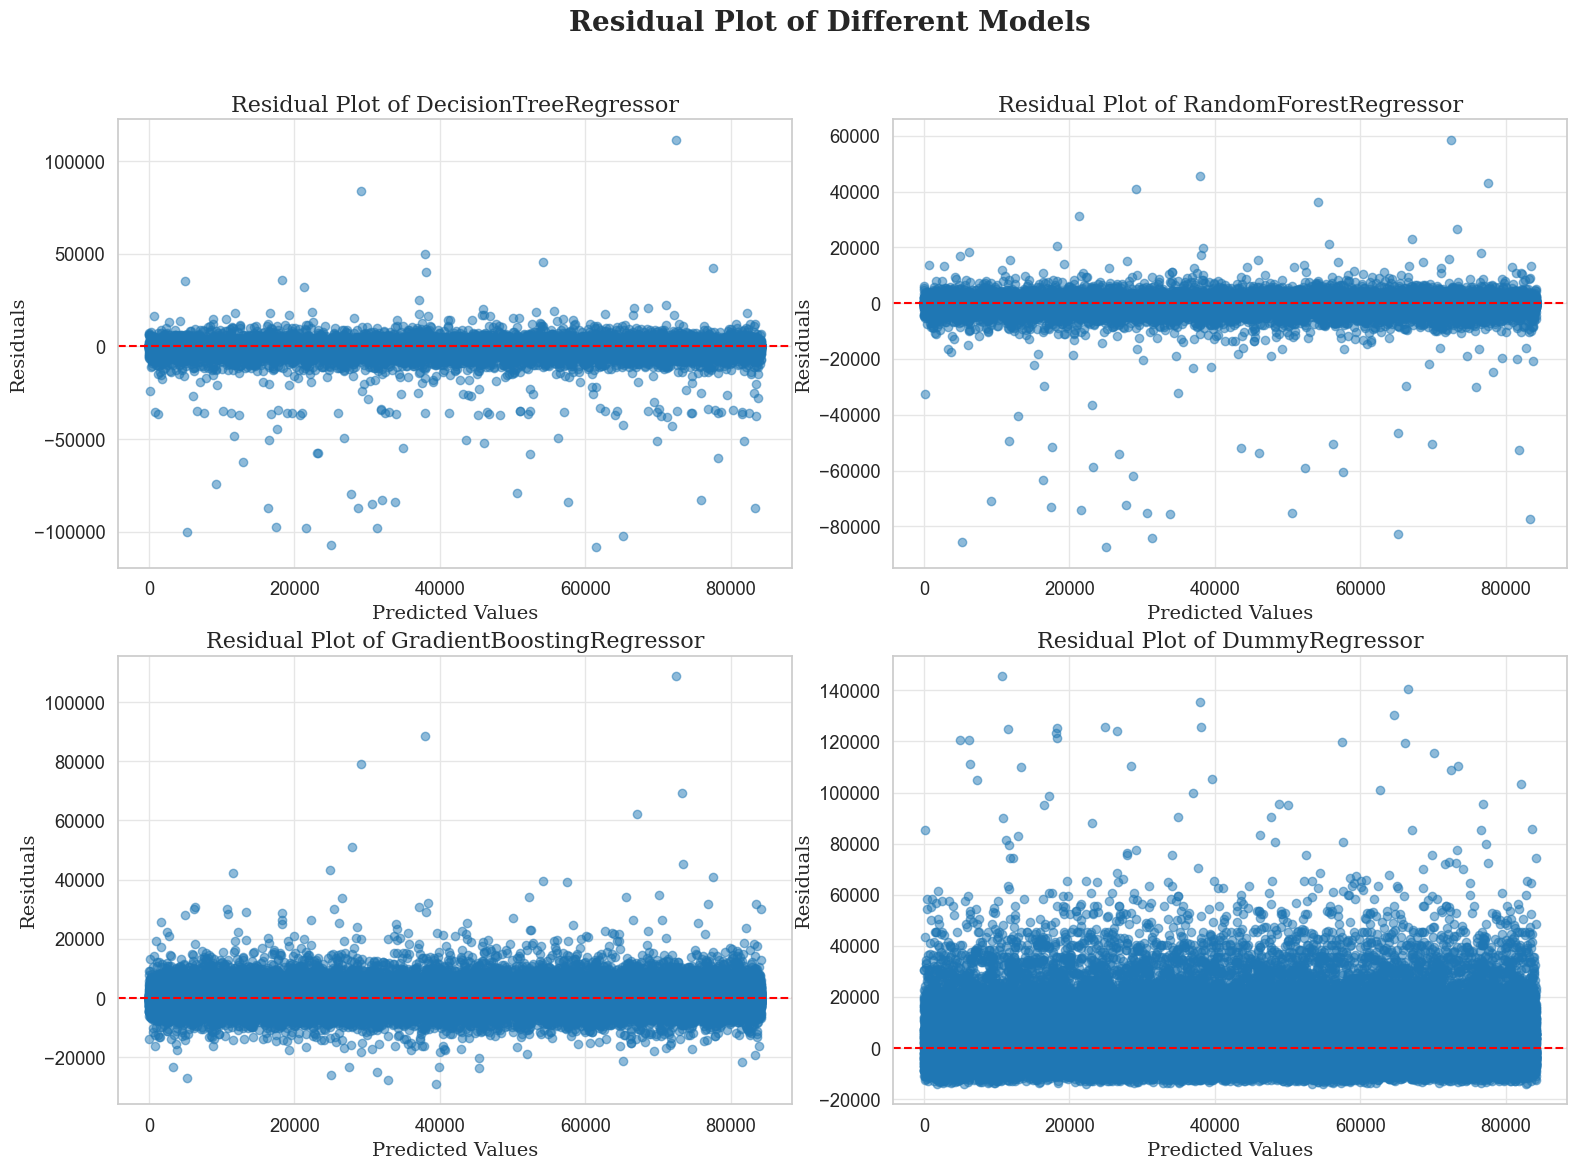

In [146]:
# Plot residual plot
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle("Residual Plot of Different Models", fontsize=20, fontweight='bold', fontfamily='serif')

fig.tight_layout(pad=2.5)

# Ridge
plot_residuals(
    tree,
    X_train,
    y_train,
    ax=ax[0, 0],
)

# Ridge
plot_residuals(
    rf,
    X_train,
    y_train,
    ax=ax[0, 1],
)

# Gradient Boosting
plot_residuals(
    gb,
    X_train,
    y_train,
    ax=ax[1, 0],
)

# Dummy Classifier
plot_residuals(
    dummy_reg,
    X_train,
    y_train,
    ax=ax[1, 1],
)

plt.show()

**Observations**:
- From the residual plot, it seems that Decision Tree and Random Forest seem to be performing better than Gradient Boosting since most of the residuals are closer to the horizontal line at 0
- It seems that for negative residuals, Gradient Boosting has fewer outliers compared to Random Forest with its most extreme negative outlier at only -20,000 while Random Forest having its most extreme negative outlier at around -80,000
- Overall, it seems that the DummyRegressor is the worst performing with a lot of the residuals not lying near the red horizontal line at 0 and with extreme outliers at values of around 140,000

**Prediction Error Plot**

In [147]:
def plot_prediction_error(model, X, y, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__

    y_pred = model.predict(X)
    
    ax.scatter(y, y_pred, c="red", marker='x')
    p1 = max(max(y_pred), max(y_test))
    p2 = min(min(y_pred), min(y_test))
    ax.plot([p1, p2], [p1, p2], "b--", label="Identity")
    a, b = np.polyfit(y, y_pred, 1)
    ax.plot(y, a * y + b, "g-", label="Best Fit")
    ax.legend()
    ax.set_xlabel("True Values")
    ax.set_ylabel("Predictions")
    ax.set_title(f"Prediction Error Plot using {model_name}")
    print(f"{model_name}'s R2: {r2_score(y,y_pred):.3f}")
    return ax

DecisionTreeRegressor's R2: 0.934
RandomForestRegressor's R2: 0.963
GradientBoostingRegressor's R2: 0.900
DummyRegressor's R2: -0.058


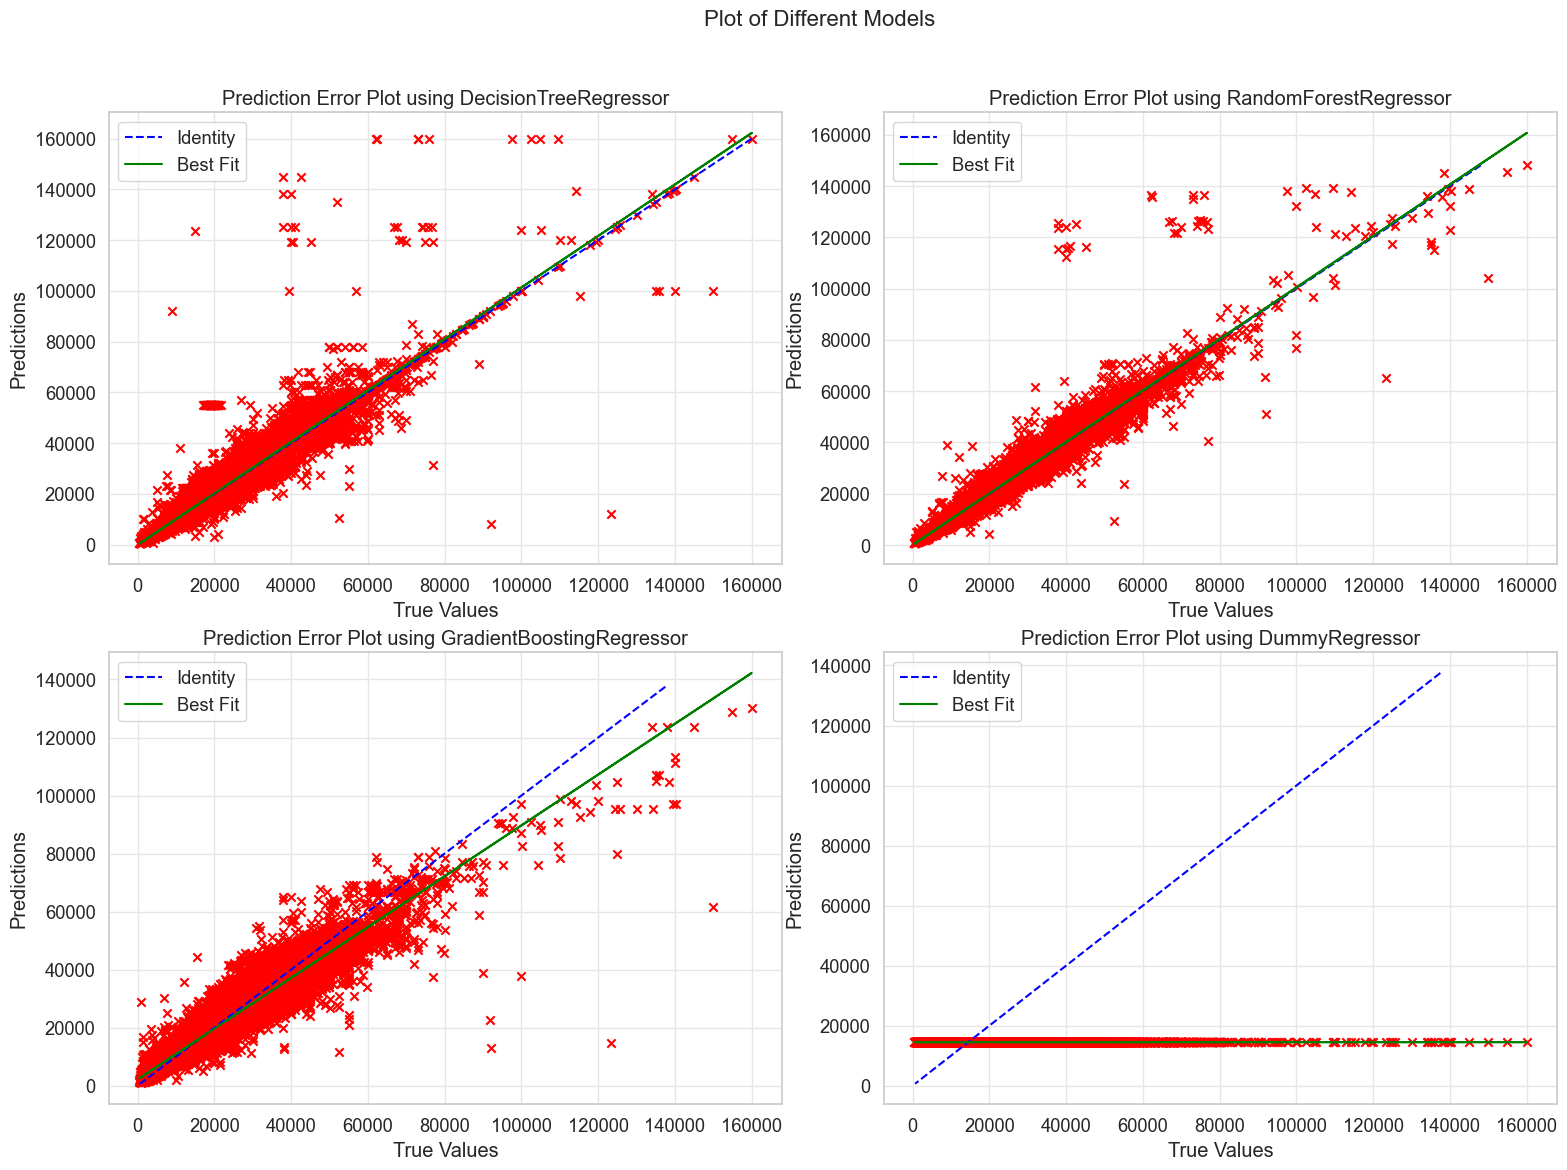

In [149]:
# Plot prediction error plot
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle("Plot of Different Models", fontsize=16)

fig.tight_layout(pad=2.5)

# Ridge
plot_prediction_error(
    tree,
    X_train,
    y_train,
    ax=ax[0, 0],
)

# ElasticNet
plot_prediction_error(
    rf,
    X_train,
    y_train,
    ax=ax[0, 1],
)

# Gradient Boosting
plot_prediction_error(
    gb,
    X_train,
    y_train,
    ax=ax[1, 0],
)

# Dummy Classifier
plot_prediction_error(
    dummy_reg,
    X_train,
    y_train,
    ax=ax[1, 1],
)

plt.show()

A prediction error plot shows the actual targets from the dataset against the predicted values generated by the model. The 45 degree line ,also known as the identity line, is the line where the prediction exactly matches the model

**Observations**:
- We notice that DummyRegressor's best fit line is very far away from the identity line which suggests that the model completely does no folLow the trend of the prices
- Random Forest's best fit line is the closest to the identity line compared to the other models since it is almost identitcal to the identity line. This suggests that Random Forest is performing better than Decision Tree amd Gradient Boosting

**Learning Curve**

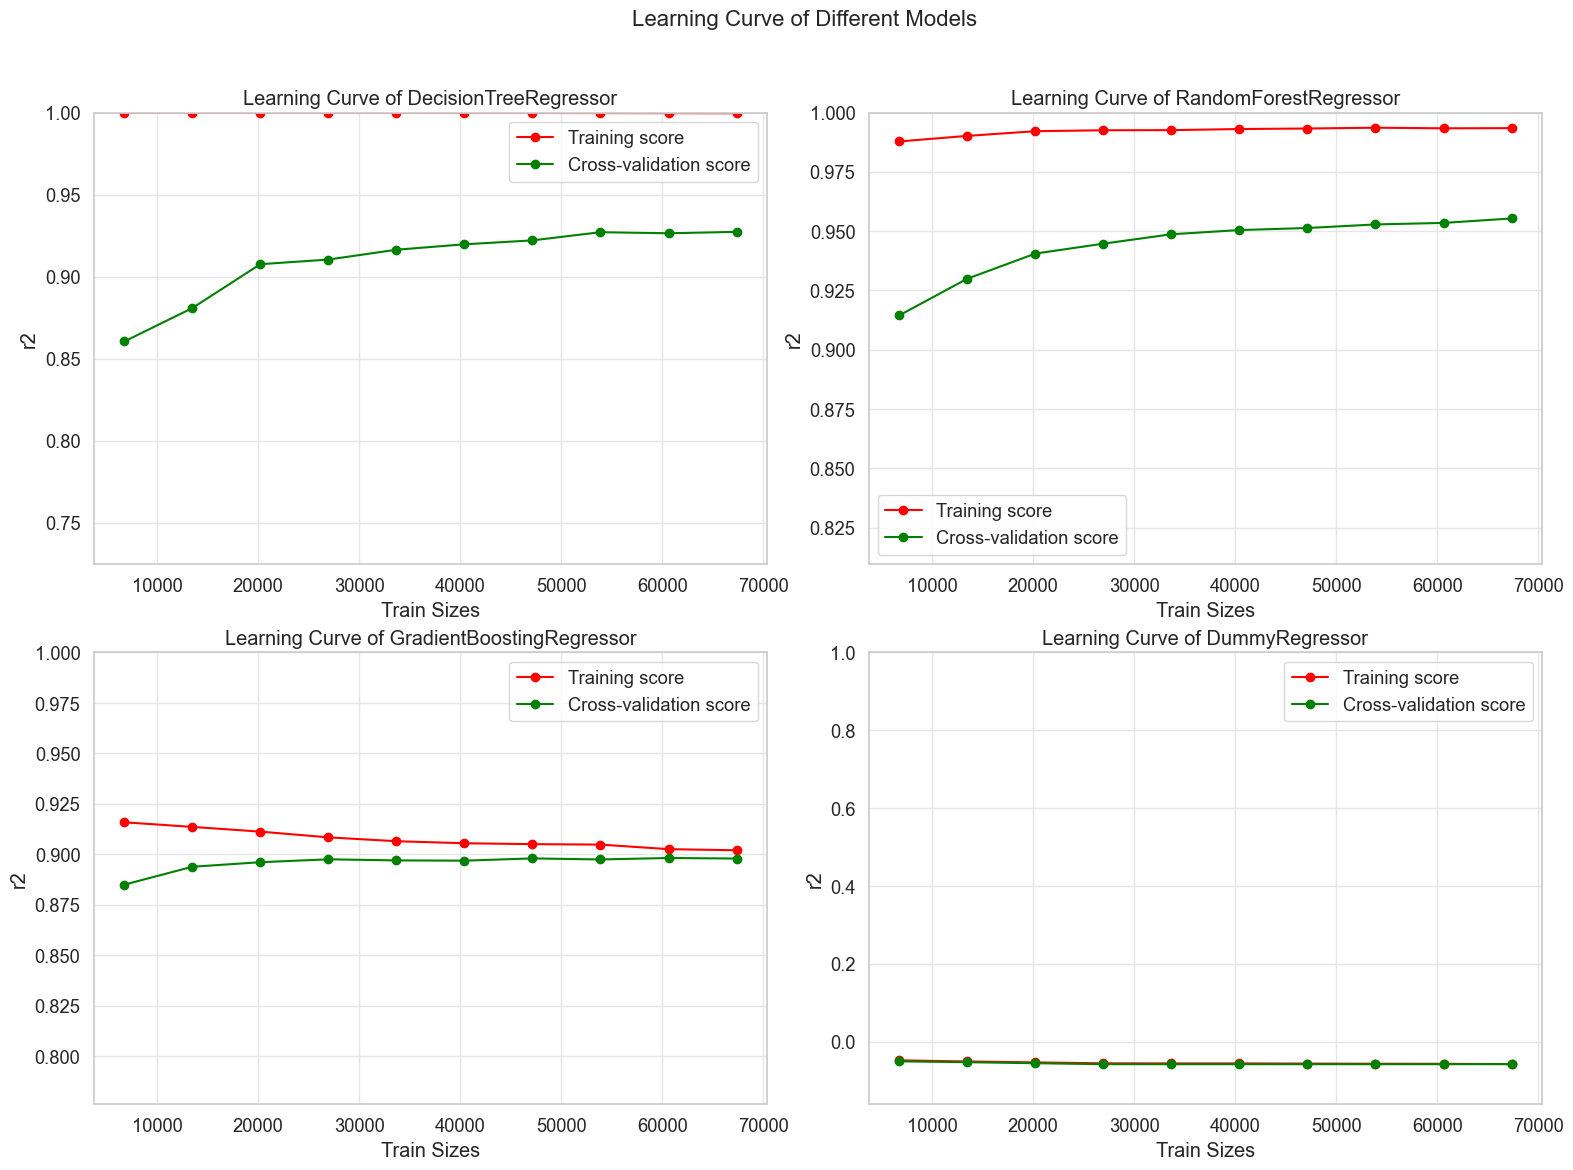

In [151]:
# Plot learning curve
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle("Learning Curve of Different Models", fontsize=16)

fig.tight_layout(pad=2.5)

# Ridge
plot_learning_curve(
    tree,
    X_train,
    y_train,
    scoring='r2',
    ax=ax[0, 0],
)

# Ridge
plot_learning_curve(
    rf,
    X_train,
    y_train,
    scoring='r2',
    ax=ax[0, 1],
)

# Gradient Boosting
plot_learning_curve(
    gb,
    X_train,
    y_train,
    scoring='r2',
    ax=ax[1, 0],
)

# Dummy Classifier
plot_learning_curve(
    dummy_reg,
    X_train,
    y_train,
    scoring='r2',
    ax=ax[1, 1],
)

plt.show()